# Mini projeto DSA

## Guia de Análise Exploratória de Dados com Python e Linguagem SQL

Neste projeto foi utilizado Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Utilizou-se também dados reais disponíveis no <a href="https://www.imdb.com/interfaces/">IMDB</a>.


Ao aplicar Análise Exploratória de Dados foi possível responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

In [15]:
#Versão da Linguagem Python
from platform import python_version
print('Versão Python neste Jupyter Notebook:', python_version())

Versão Python neste Jupyter Notebook: 3.9.7


In [16]:
#Instalando o pacote
!pip install -q imdb-sqlite

In [17]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry

In [19]:
# Imports
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

### Carregando os dados
Primeiro baixamos os dados.

In [8]:
%%time
!imdb-sqlite

Wall time: 48min 54s


2022-09-11 14:08:37,091 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads\name.basics.tsv.gz
2022-09-11 14:08:55,197 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads\title.basics.tsv.gz
2022-09-11 14:09:09,381 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads\title.akas.tsv.gz
2022-09-11 14:09:34,300 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads\title.principals.tsv.gz
2022-09-11 14:10:10,364 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads\title.episode.tsv.gz
2022-09-11 14:10:13,933 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads\title.ratings.tsv.gz
2022-09-11 14:10:14,606 Populating database: imdb.db
2022-09-11 14:10:14,615 Applying schema
2022-09-11 14:10:14,633 Importing file: downloads\name.basics.tsv.gz
2022-09-11 14:10:14,633 Reading number of rows ...
2022-09-11 14:10:21,906 Inserting rows into table: people

  6%|6         | 719034/11917235 [00:16<04:21, 42894.68 rows/s]


 30%|###       | 3612458/11917235 [01:24<03:01, 45726.82 rows/s]


 56%|#####5    | 6647498/11917235 [02:32<02:09, 40627.37 rows/s]


 64%|######3   | 7571357/11917235 [02:54<02:52, 25157.88 rows/s]


 99%|#########8| 11780694/11917235 [04:33<00:03, 45441.69 rows/s]


100%|##########| 11917235/11917235 [04:37<00:00, 43021.71 rows/s]
2022-09-11 14:14:58,966 Importing file: downloads\title.basics.tsv.gz
2022-09-11 14:14:58,966 Reading number of rows ...
2022-09-11 14:15:04,483 Inserting rows into table: titles

 10%|9         | 914324/9216766 [00:25<03:33, 38822.64 rows/s]


 58%|#####8    | 5367348/9216766 [02:28<01:46, 36080.73 rows/s]


 73%|#######2  | 6709637/9216766 [03:05<01:05, 38233.31 rows/s]


100%|##########| 9216766/9216766 [04:14<00:00, 36172.55 rows/s]
2022-09-11 14:19:19,295 Importing file: downloads\title.akas.tsv.gz
2022-09-11 14:19:19,295 Reading number of rows ...
2022-09-11 14:19:29,690 Inserting rows into table: akas

  1%|          | 275198/33212962 [00:06<12:00, 45726.25 rows/s]


 10%|9         | 3316033/33212962 [01:13<10:24, 47844.70 rows/s]


 21%|##        | 6946832/33212962 [02:32<09:57, 43956.09 rows/s]


 33%|###3      | 11072740/33212962 [04:01<07:39, 48136.58 rows/s]


 41%|####1     | 13707674/33212962 [04:59<06:59, 46535.64 rows/s]


 52%|#####2    | 17378983/33212962 [06:19<05:44, 45933.90 rows/s]


 59%|#####9    | 19667235/33212962 [07:10<04:50, 46585.75 rows/s]


 67%|######6   | 22141116/33212962 [08:05<04:00, 45997.46 rows/s]


 83%|########2 | 27497313/33212962 [10:04<02:10, 43903.85 rows/s]


 90%|########9 | 29841398/33212962 [10:55<01:18, 42955.53 rows/s]


100%|##########| 33212962/33212962 [12:09<00:00, 45507.93 rows/s]
2022-09-11 14:31:39,530 Importing file: downloads\title.principals.tsv.gz
2022-09-11 14:31:39,530 Reading number of rows ...
2022-09-11 14:31:55,208 Inserting rows into table: crew

  1%|          | 266752/52010580 [00:04<15:35, 55283.43 rows/s]


  7%|7         | 3735650/52010580 [01:07<14:06, 57006.19 rows/s]


 13%|#2        | 6510141/52010580 [01:55<13:48, 54915.70 rows/s]


 23%|##2       | 11899967/52010580 [03:31<11:29, 58159.75 rows/s]


 31%|###       | 16021091/52010580 [04:45<10:18, 58154.03 rows/s]


 38%|###8      | 19959423/52010580 [05:57<09:43, 54922.96 rows/s]


 45%|####4     | 23392290/52010580 [06:59<08:34, 55638.87 rows/s]


 51%|#####     | 26520511/52010580 [07:56<07:40, 55385.69 rows/s]


 60%|#####9    | 31033457/52010580 [09:17<06:20, 55179.67 rows/s]


 65%|######5   | 33920701/52010580 [10:09<05:35, 53896.47 rows/s]


 74%|#######3  | 38465759/52010580 [11:32<04:01, 56137.37 rows/s]


 86%|########5 | 44473303/52010580 [13:20<02:20, 53724.10 rows/s]


 91%|#########1| 47338476/52010580 [14:12<01:23, 55639.31 rows/s]


100%|##########| 52010580/52010580 [15:36<00:00, 55511.88 rows/s]
2022-09-11 14:47:32,146 Importing file: downloads\title.episode.tsv.gz
2022-09-11 14:47:32,146 Reading number of rows ...
2022-09-11 14:47:33,443 Inserting rows into table: episodes

  5%|4         | 340989/6947269 [00:05<01:36, 68209.74 rows/s]


 51%|#####     | 3524710/6947269 [00:53<00:51, 66130.09 rows/s]


100%|##########| 6947269/6947269 [01:44<00:00, 66659.65 rows/s]
2022-09-11 14:49:17,674 Importing file: downloads\title.ratings.tsv.gz
2022-09-11 14:49:17,674 Reading number of rows ...
2022-09-11 14:49:17,857 Inserting rows into table: ratings

 92%|#########2| 1160868/1259757 [00:19<00:01, 59046.50 rows/s]


100%|##########| 1259757/1259757 [00:21<00:00, 58768.28 rows/s]
2022-09-11 14:49:39,303 Creating table indices ...
2022-09-11 14:57:31,405 Import successful


In [20]:
#Conecta no banco de dados
conn = sqlite3.connect("imdb.db")

In [21]:
#Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [22]:
#Retornando o tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [23]:
#Visualizando o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [24]:
#Converter o dataframe em lista
tabelas = tabelas['Table_Name'].values.tolist()

In [25]:
#Percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




## 1- Quais são as categorias de filmes mais comuns no IMDB?

In [26]:
#Consulta SQL
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [27]:
#Extraindo o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [28]:
#Visualizando o resultado
display(resultado1)

,type,COUNT
0,movie,620888
1,short,888687
2,tvEpisode,6947595
3,tvMiniSeries,45057
4,tvMovie,137534
5,tvPilot,2
6,tvSeries,230856
7,tvShort,10663
8,tvSpecial,38235
9,video,265106


In [30]:
#Calcular o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [31]:
#Visualizando o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,620888,6.736506
1,short,888687,9.642070
2,tvEpisode,6947595,75.379965
3,tvMiniSeries,45057,0.488859
4,tvMovie,137534,1.492215
5,tvPilot,2,0.000022
6,tvSeries,230856,2.504740
7,tvShort,10663,0.115691
8,tvSpecial,38235,0.414842
9,video,265106,2.876345


In [33]:
#Criando um gráfico com 4 categorias:
# 3 categorias com mais títulos e 1 com todo o restante

#Criando um dicionário vazio
others = {}

#Filtrando o percentual em 5% e somando o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

#Gravando o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

#Ajustando o nome
others['type'] = 'others'

In [34]:
#Visualizando
others

{'COUNT': 759596, 'percentual': 8.241459097475188, 'type': 'others'}

In [35]:
#Filtrando o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [37]:
#Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [39]:
#Ordenando o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [40]:
#Visualizando
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6947595,75.379965
1,short,888687,9.642070
3,others,759596,8.241459
0,movie,620888,6.736506


In [42]:
#Ajustando os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

<function matplotlib.pyplot.show(close=None, block=None)>

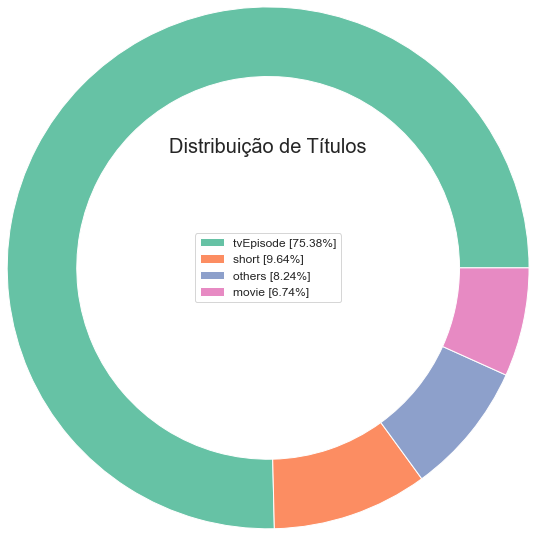

In [44]:
#Plot

#Mapa de cores
cs = cm.Set2(np.arange(100))

#Criando a figura
f = plt.figure()

#Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20, 'fontweight':20})
plt.show

## 2- Qual o Número de Títulos Por Gênero?

Calcular o número de *filmes* por gênero e entregar o resultado em valor percentual.

In [49]:
#Consulta SQL
consulta2 = '''SELECT genres, COUNT(*) AS COUNT FROM titles WHERE type = 'movie' GROUP BY genres'''

In [50]:
#Extraindo o resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [51]:
#Visualizando o resultado
display(resultado2)

,genres,COUNT
0,Action,14185
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1461,"Thriller,Western",43
1462,War,1313
1463,"War,Western",14
1464,Western,5144


In [52]:
#Convertendo as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [55]:
#Removendo valores NA 
temp = resultado2['genres'].dropna()

Usamos o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero.

![title](imagens/one-hot.png)

In [56]:
#Criando um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [57]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [58]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [59]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [60]:
#Retornando gêneros únicos
generos_unicos = vetor.get_feature_names()

In [61]:
#verificando ***
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'n',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [62]:
#Criando um dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [63]:
#Visualizando
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 1465
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1466 non-null   int64
 1   adult        1466 non-null   int64
 2   adventure    1466 non-null   int64
 3   animation    1466 non-null   int64
 4   biography    1466 non-null   int64
 5   comedy       1466 non-null   int64
 6   crime        1466 non-null   int64
 7   documentary  1466 non-null   int64
 8   drama        1466 non-null   int64
 9   family       1466 non-null   int64
 10  fantasy      1466 non-null   int64
 11  film-noir    1466 non-null   int64
 12  game-show    1466 non-null   int64
 13  history      1466 non-null   int64
 14  horror       1466 non-null   int64
 15  music        1466 non-null   int64
 16  musical      1466 non-null   int64
 17  mystery      1466 non-null   int64
 18  n            1466 non-null   int64
 19  news         1466 non-null   int64
 20  reality-

In [64]:
#Remoção da coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [65]:
#Calculando o percentual 
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [66]:
#Visualizando
generos_percentual.head(10)

drama          17.939973
comedy         16.984993
documentary    15.893588
adventure      14.802183
action         14.392906
romance        13.301501
crime          12.960437
mystery        12.346521
thriller       12.278308
horror         12.278308
dtype: float64

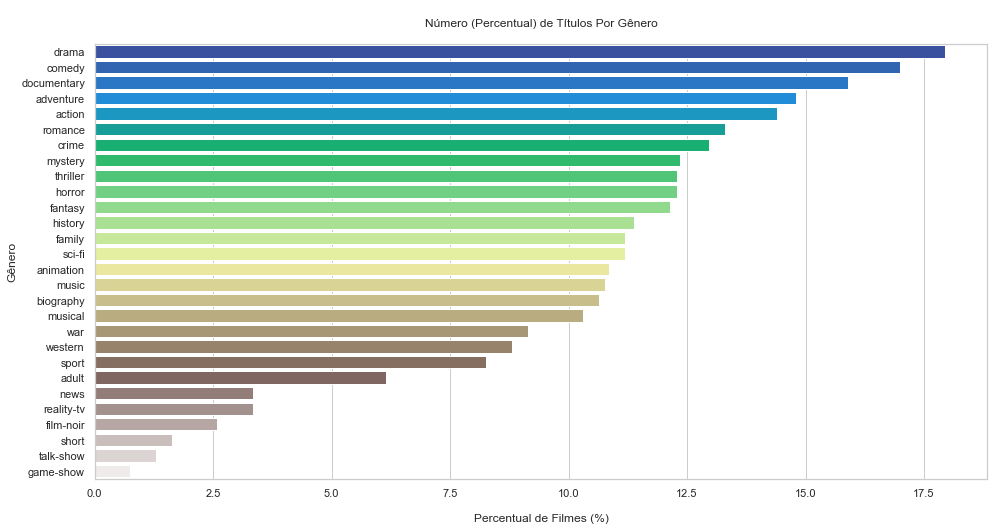

In [67]:
#Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

## 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

Mediana de avaliação dos filmes.

In [33]:
#Consulta SQL
consulta3 = '''SELECT rating, genres FROM
                ratings JOIN titles ON ratings.title_id = titles.title_id
                WHERE premiered <= 2022 AND type = 'movie'
                '''

In [34]:
#Extraindo o resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [85]:
#Visualizar o resultado
display(resultado3)

,rating,genres
0,5.2,Romance
1,3.7,\N
2,6.0,"Action,Adventure,Biography"
3,4.0,Drama
4,4.1,Drama
...,...,...
282053,5.8,Thriller
282054,6.4,"Drama,History"
282055,3.8,"Adventure,History,War"
282056,8.3,Drama


In [31]:
#Criando uma função para retornar os gêneros
def retornar_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = resultado3['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [35]:
#Aplicando a função
generos_unicos = retornar_generos(resultado3)

In [91]:
#Visualizando
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [92]:
#Criando listas vazias
#Uma para a contagem de filmes por gêneros e outra para avaliações
genero_counts = []
genero_ratings = []

In [94]:
for item in generos_unicos:
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id = titles.title_id WHERE genres LIKE'+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
    
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [95]:
#Preparando o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [96]:
#Visualizando
df_genero_ratings.head(20)

,genres,count,rating
0,action,29232,5.8
1,adult,4404,5.8
2,adventure,17679,6.0
3,animation,4838,6.6
4,biography,8621,7.0
5,comedy,69612,6.0
6,crime,24127,6.1
7,documentary,42453,7.3
8,drama,124940,6.3
9,family,10872,6.3


In [97]:
#Removendo o índice 18 (new)
df_genero_ratings = df_genero_ratings.drop(index=18)

In [98]:
#Ordenando o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

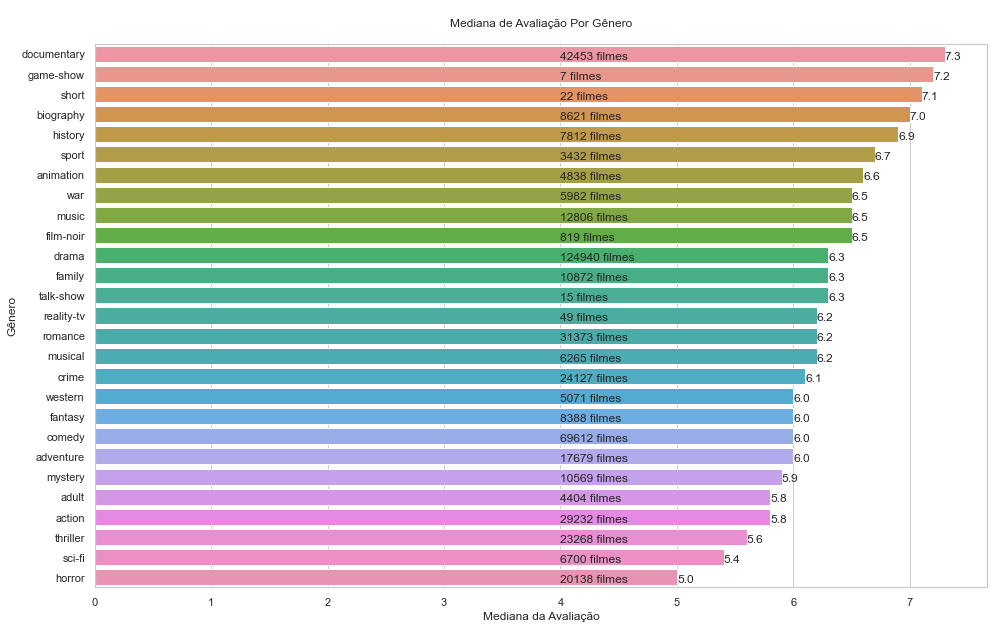

In [100]:
#Plot

#Figura
plt.figure(figsize = (16,10))

#Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

#Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    plt.text(4.0,
            i + 0.25,
            str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

## 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

Mediana de avaliação dos filmes.

In [103]:
#Consulta SQL
consulta4 = '''SELECT rating AS Rating, premiered FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie' 
            ORDER BY premiered'''

In [104]:
#Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [105]:
#Visualizando o resultado
display(resultado4)

,Rating,premiered
0,5.2,1894
1,6.2,1896
2,4.4,1897
3,3.9,1899
4,3.2,1899
...,...,...
282053,8.0,2022
282054,6.8,2022
282055,5.3,2022
282056,3.9,2022


In [107]:
#Calcular a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [108]:
type(ratings)

list

In [109]:
ratings[1:10]

[6.2, 4.4, 3.55, 5.35, 4.1, 3.4, 4.0, 5.3, 3.8]

In [110]:
#Lista de anos
anos = list(set(resultado4['premiered']))

In [111]:
anos[1:10]

[1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905]

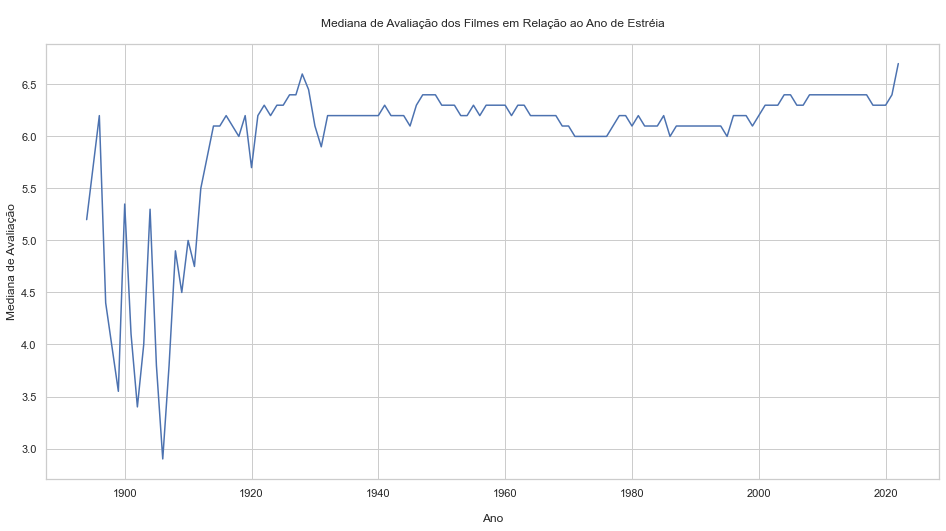

In [112]:
#Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes em Relação ao Ano de Estréia\n')
plt.show()

## 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
Número de filmes por gênero. Vamos listar os Top 5.

In [113]:
#Consulta SQL
consulta5 = 'SELECT genres FROM titles'

In [114]:
#Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [115]:
#Visualizando o resultado
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9216761,"Action,Drama,Family"
9216762,"Action,Drama,Family"
9216763,"Action,Drama,Family"
9216764,Short


In [118]:
#retornando gêneros únicos
generos_unicos = retornar_generos(resultado5)

In [119]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [121]:
#Fazendo a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) AS COUNT FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [122]:
#Preparando o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [123]:
df_genero_count

,genre,Count
0,action,41981
1,adult,8688
2,adventure,22777
3,animation,7008
4,biography,13969
5,comedy,92756
6,crime,31300
7,documentary,108468
8,drama,195973
9,family,15212


In [124]:
#Calculando o top 5

df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
#Ordenando os resultados
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
#Função head() retornar os 5 primeiros registros
top_generos = df_genero_count.head()['genre'].values

In [125]:
top_generos

array(['drama', 'documentary', 'comedy', 'action', 'romance'],
      dtype=object)

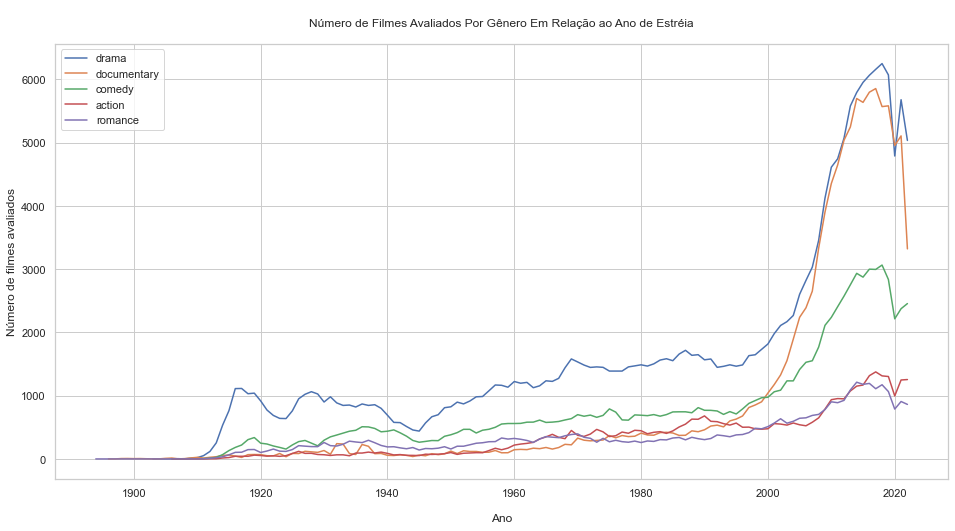

In [128]:
#Plot

#figure
plt.figure(figsize = (16,8))

for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM titles WHERE genres LIKE '+'\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <= 2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])
    
plt.xlabel('\nAno')
plt.ylabel('Número de filmes avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

## 6- Qual o Filme com maior tempo de duração? Calcule os Percentis.

Percentis e filme mais longo da história

In [130]:
#Consulta SQL
consulta6 = '''SELECT runtime_minutes Runtime 
                FROM titles
                WHERE type = 'movie' AND Runtime != 'NaN' 
                '''

In [131]:
#Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [132]:
#Visualizando
display(resultado6)

,Runtime
0,45
1,100
2,70
3,90
4,120
...,...
391823,123
391824,57
391825,100
391826,116


In [133]:
#Cálculo dos percentis
for i in range(101):
    val = i
    #Calcular o percentil e arredondar para 2 casa decimais
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 54.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [9]:
#Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles
            WHERE type = 'movie' 
            AND Runtime != 'NaN' 
            ORDER BY Runtime DESC
            LIMIT 1'''

In [11]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [11]:
resultado6

,Runtime,primary_title
0,51420,Logistics


## 7- Qual a relação entre Duração e Gênero?

In [26]:
#Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres
            FROM titles
            WHERE type = 'movie' 
            AND runtime_minutes != 'NaN' 
            GROUP BY genres'''

In [27]:
#Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [36]:
#Retorna gêneros únicos
generos_unicos = retornar_generos(resultado7)

In [37]:
#Calculando a duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [40]:
#Preparando o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [41]:
#Remove o índice 18
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [42]:
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

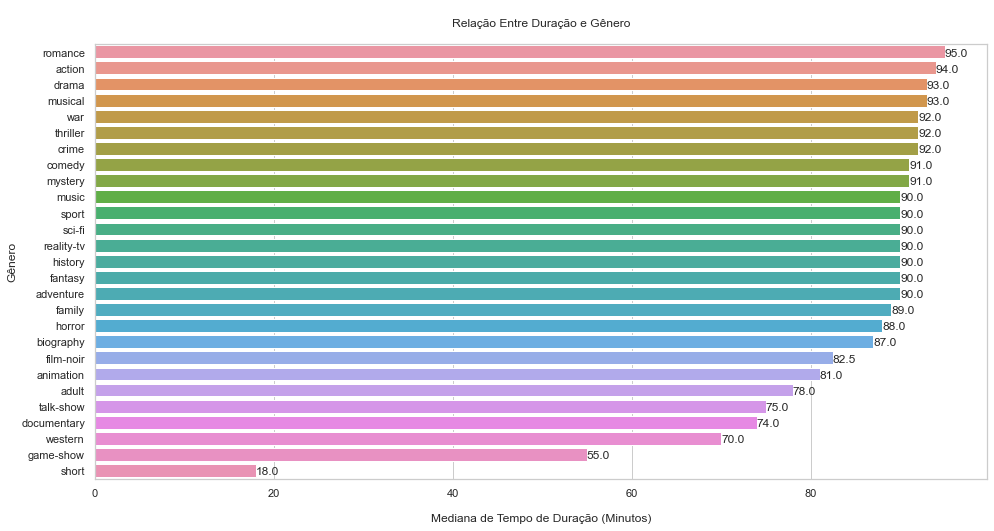

In [45]:
#Plot

#Tamanho da figura
plt.figure(figsize = (16,8))

#Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

#Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
            i + 0.25,
            round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))
    
plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

## 8- Qual o Número de Filmes Produzidos Por País?

In [48]:
#Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM
            akas JOIN titles ON
            akas.title_id = titles.title_id
            WHERE region != 'None' 
            AND type = \'movie\' 
            GROUP BY region
            '''

In [49]:
#Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [50]:
display(resultado8)

,region,Number_of_movies
0,AD,21
1,AE,7879
2,AF,110
3,AG,12
4,AL,1301
...,...,...
230,YUCS,153
231,ZA,8039
232,ZM,18
233,ZRCD,2


In [51]:
#Shape
resultado8.shape

(235, 2)

In [52]:
#Número de linhas
resultado8.shape[0]

235

In [53]:
#Listas auxiliares
nomes_paises = []
contagem = []

In [59]:
#Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except:
        continue

In [60]:
#Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [61]:
#Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [62]:
#Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
200,United States,317094
66,United Kingdom,161317
97,Japan,93550
90,India,86396
64,France,86239
32,Canada,81660
48,Germany,72695
59,Spain,67288
94,Italy,66654
26,Brazil,66568


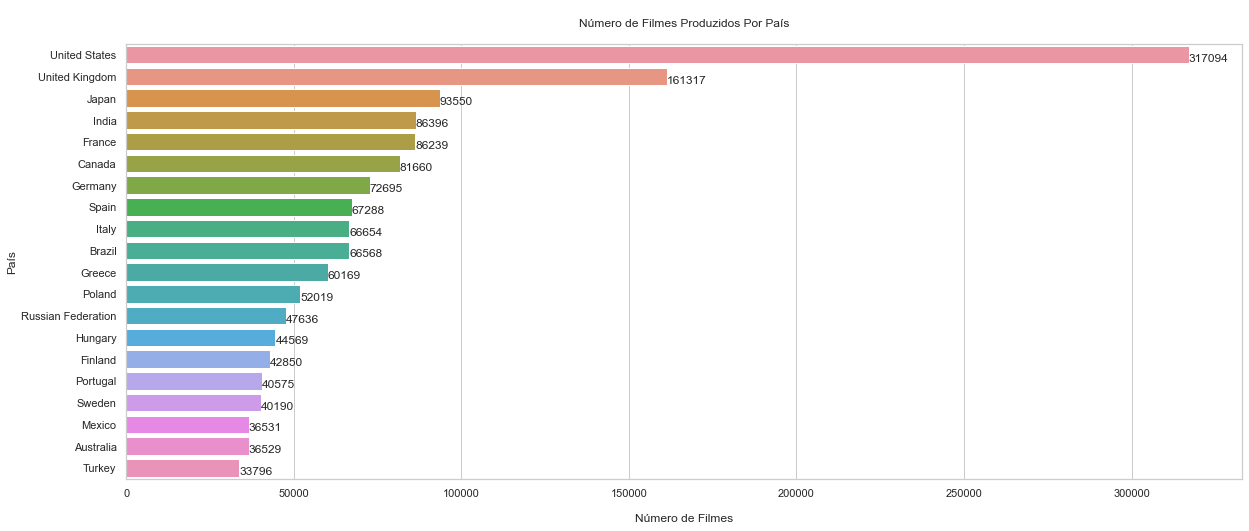

In [63]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais são os Top 10 Melhores Filmes?

In [68]:
#Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM
            titles JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10
            '''

In [69]:
#Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [71]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,The Chaos Class,"Comedy,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,12 Angry Men,"Crime,Drama",9.0
5,The Godfather Part II,"Crime,Drama",9.0
6,Schindler's List,"Biography,Drama,History",9.0
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,Mirror Game,"Crime,Mystery,Thriller",9.0


## 10- Quais São os Top 10 Piores Filmes?

In [72]:
#Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM
            titles JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            '''

In [73]:
#Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [74]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9
